In [26]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots

df_kghm = pd.read_csv('kgh_d.csv')
df_copper = pd.read_csv('ca_c_f_d.csv')

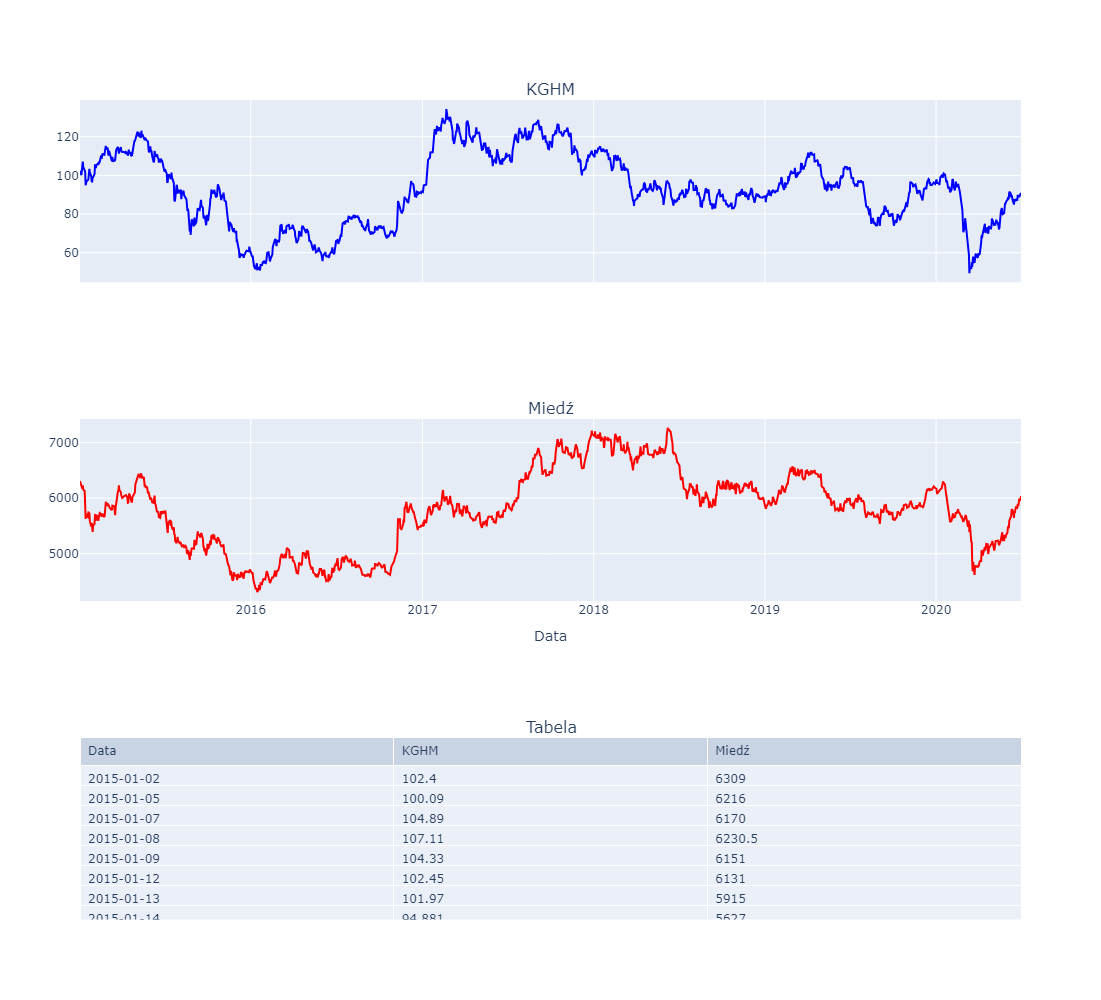

In [27]:
df_kghm['Data'] = pd.to_datetime(df_kghm['Data'])
df_copper['Data'] = pd.to_datetime(df_copper['Data'])

merged_df = pd.merge_asof(df_kghm, df_copper, on='Data')

trace_kghm = go.Scatter(x=merged_df['Data'], y=merged_df['Zamkniecie_x'], mode='lines', name='KGHM', line=dict(color='blue'))
trace_copper = go.Scatter(x=merged_df['Data'], y=merged_df['Zamkniecie_y'], mode='lines', name='Miedź', line=dict(color='red'))

table = go.Table(
    header=dict(values=['Data', 'KGHM', 'Miedź'],
                align='left'),
    cells=dict(values=[merged_df['Data'].dt.strftime('%Y-%m-%d'), merged_df['Zamkniecie_x'], merged_df['Zamkniecie_y']],
               align='left')
)

fig = make_subplots(
    rows=3, cols=1,
    specs=[[{"type": "scatter"}], [{"type": "scatter"}], [{"type": "table"}]],
    row_heights=[0.4, 0.4, 0.4],
    subplot_titles=('KGHM', 'Miedź', 'Tabela')
)

fig.add_trace(trace_kghm, row=1, col=1)
fig.add_trace(trace_copper, row=2, col=1)
fig.add_trace(table, row=3, col=1)

fig.update_xaxes(title_text='', row=1, col=1, showticklabels=False)
fig.update_xaxes(title_text='Data', row=2, col=1)  

fig.update_layout(showlegend=False, height=1000, title_x=0.5)


fig.show()